# Data Setup

In [2]:
# Some common packages that we may need
from pandas.plotting import scatter_matrix 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

def load_police_data():
  crimes=pd.read_csv('./data/Crime_Data.csv')
  return crimes

def load_oridinal_violence_features():
  ordinal_violence=pd.read_csv('./data/crime_categories.csv')
  return ordinal_violence

Now that the data is loaded we want to look at the data and see how it is organized and what groups are being used. We can also get some insight onto if the data may be useful adn we can look and see how we may split or encode our data.

In [3]:
crimes = load_police_data()
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  int64  
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


In [4]:
crimes.head(10)

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Larceny - All Other,202200030104,800.0,ELLIOTT AVE,CPD,2022/10/18 01:08:59+00,2108,"Lowe, Courtney"
1,2,Burglary,202200030099,800.0,RAYMOND RD,CPD,2022/10/18 00:31:50+00,2031,"Lowe, Courtney"
2,3,Assault Aggravated,202200030096,900.0,W MAIN ST,CPD,2022/10/17 23:40:34+00,1940,"Alfonso, Sean"
3,4,Assist Citizen - Mental/TDO/ECO,202200030087,600.0,E MARKET ST,CPD,2022/10/17 22:24:21+00,1824,"Lowe, Courtney"
4,5,Assault Simple,202200030080,1400.0,UNIVERSITY AVE,CPD,2022/10/17 19:58:39+00,1558,"Houchens, Logan"
5,6,Trespass,202200030061,500.0,PRESTON AVE,CPD,2022/10/17 17:35:18+00,1335,"Houchens, Jamell"
6,7,Motor Vehicle Theft,202200030053,600.0,14TH ST NW,CPD,2022/10/17 14:54:03+00,1054,"Nash, Darius"
7,8,Larceny - Theft from Building,202280000894,100.0,BAYLOR LN,CPD,2022/10/17 13:24:02+00,924,"Moje, Ashley"
8,9,Larceny - From Motor Vehicle,202280000893,1400.0,FOREST RIDGE RD,CPD,2022/10/17 12:39:53+00,839,"Moje, Ashley"
9,10,Drug/Narcotics Violation,202200030029,1700.0,HYDRAULIC RD,CPD,2022/10/17 10:40:25+00,640,"Curry, Brian"


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  int64  
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


# Data Exploration

## Non Numerical Data Exploration

Now lets look a little closer at the non numerical data

In [6]:
crimes["Offense"].value_counts()

Hit and Run                         2120
Assault Simple                      1963
Suspicious Activity                 1634
Vandalism                           1609
Larceny - All Other                 1557
                                    ... 
Tactical Crime Initiative - TCI        1
911 Investigation                      1
Prostitution-assisting/promoting       1
Field Interview                        1
Alarm-Accidental                       1
Name: Offense, Length: 119, dtype: int64

In [7]:
crimes["StreetName"].value_counts()

E MARKET ST               1134
EMMET ST N                1048
W MAIN ST                 1007
E MAIN ST                  520
5TH ST SW                  450
                          ... 
1ST ST S, 207                1
MICHIE DR, 115               1
HOLIDAY DR, 116              1
CULBRETH RD / RUGBY RD       1
15TH ST NW, 2013             1
Name: StreetName, Length: 3401, dtype: int64

In [8]:
crimes["Agency"].value_counts()

CPD    24577
Name: Agency, dtype: int64

In [9]:
crimes["DateReported"].value_counts()

2017/10/21 12:30:00+00    6
2018/06/29 02:20:19+00    6
2017/11/04 15:00:00+00    4
2019/10/07 18:46:09+00    4
2018/06/15 14:08:49+00    4
                         ..
2021/04/02 19:55:45+00    1
2021/04/03 00:29:07+00    1
2021/04/03 02:48:26+00    1
2021/04/03 03:17:20+00    1
2017/10/20 04:35:00+00    1
Name: DateReported, Length: 24453, dtype: int64

In [10]:
crimes["ReportingOfficer"].value_counts()

Moje, Ashley        1060
Shiflett, Tammy      611
Stein, Nathan        523
Newton, Arla         472
Pittman, Terry       447
                    ... 
Arnette, Locia         1
Beasley, Timothy       1
Hopkins, Emma          1
Cosgro, Blaine         1
Thomas, Alfred         1
Name: ReportingOfficer, Length: 175, dtype: int64

There are a lot of categories in the non-numerical data. This is not as worrying as it could be since a lot of the data seems like it is unnecessary for our project. It does not seem like we are going to need Reporting Officer, Agency, and Date Reported. We can just use the hours integer to get the time. 

Small side note: It would be interesting to look up odds of getting arrested on certain streets depending on who is on duty, but that is outside of the scope of our particular project. 

## Numerical Data Exploration

Now we will look at histograms of the numerical data below. From this data we will determine what is important information and what is not. 

array([[<AxesSubplot: title={'center': 'RecordID'}>,
        <AxesSubplot: title={'center': 'IncidentID'}>],
       [<AxesSubplot: title={'center': 'BlockNumber'}>,
        <AxesSubplot: title={'center': 'HourReported'}>]], dtype=object)

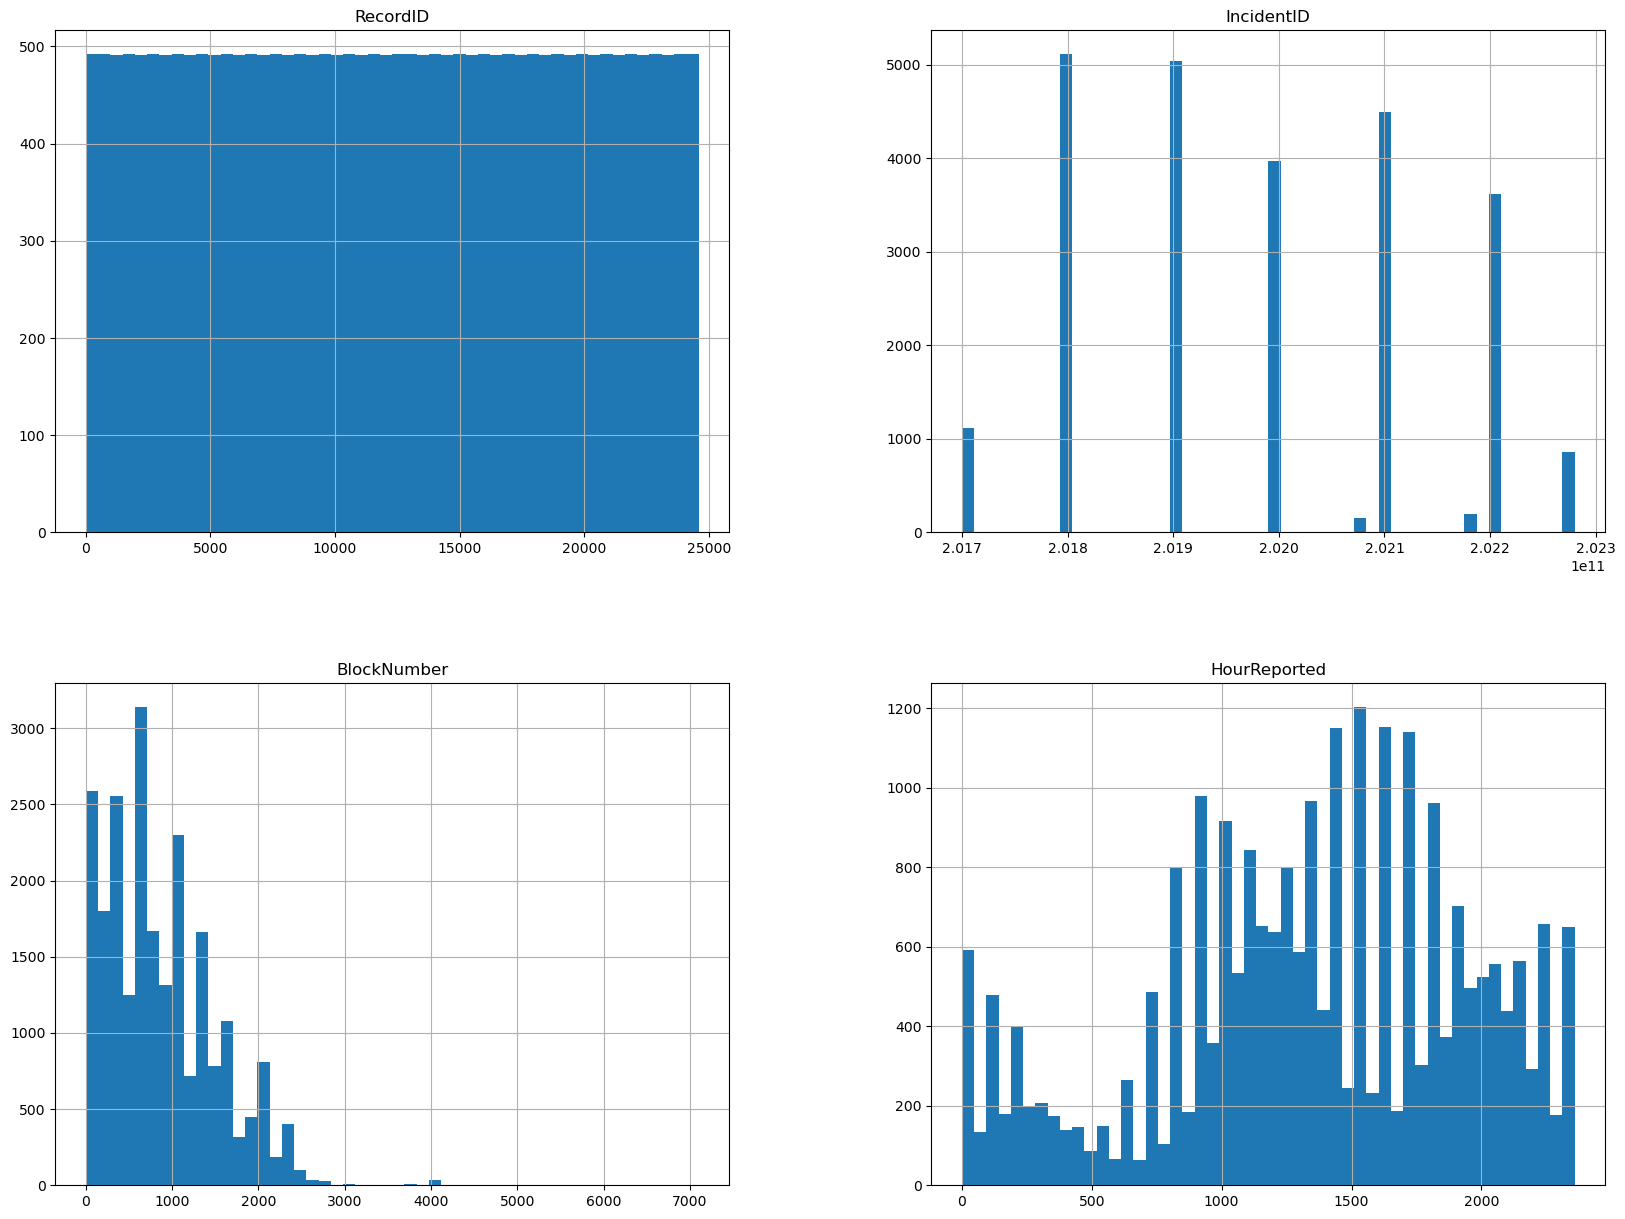

In [11]:
crimes.hist(bins=50, figsize=(20,15))

<AxesSubplot: >

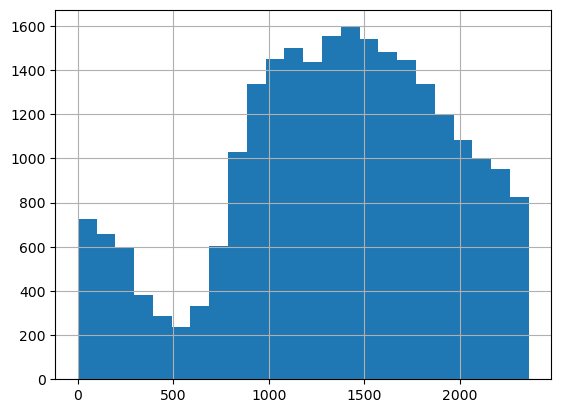

In [12]:
crimes['HourReported'].hist(bins=24) # if we use more than 24 bins, the fact that nothing can be reported after 59 minutes makes the bar plot really weird

The histrogram of the Record ID behaved exactly as expected. We assumed that Incident ID would also not be very useful but it is organized by year, which will not really fit into what we are doing for this part of the project, but it would be interesting to look at what crimes have become less frequent over time, and it may actually play a role so even though we initially plan on getting rid of it, we will reevaluate as we continue to work on the project. 
There are some correlations with lower block numbers having more incidents which we did not suspect as a group but more incidents at later hours was something we expected. 

## Null Data

First we will observe the null data and think of a plan to deal with it.

In [13]:
incomplete_data = crimes[crimes.isnull().any(axis=1)].head()
incomplete_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
15,16,Hit and Run,202200029979,NaN,BAILEY RD @ 5TH ST,CPD,2022/10/16 23:08:33+00,1908,"Alfonso, Sean"
39,40,Hit and Run,202200029819,NaN,ALTAMONT CIR / W HIGH ST,CPD,2022/10/15 05:38:27+00,138,"Lowry, Brent"
55,56,Hit and Run,202200029704,NaN,IVY RD / EMMET ST N,CPD,2022/10/14 04:47:19+00,47,"Hounsel, Eli"
57,58,Vandalism,202200029697,NaN,GARRETT ST / 2ND ST SE,CPD,2022/10/14 03:58:33+00,2358,"Blackwell, Ryan"
71,72,Assist Citizen - Welfare Check,202200029599,NaN,LANKFORD AVE / 1ST ST S,CPD,2022/10/13 01:58:30+00,2158,"Whitten, Tobyn"


In [14]:
crimes_without_null = crimes.dropna()
crimes_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          23189 non-null  int64  
 1   Offense           23189 non-null  object 
 2   IncidentID        23189 non-null  int64  
 3   BlockNumber       23189 non-null  float64
 4   StreetName        23189 non-null  object 
 5   Agency            23189 non-null  object 
 6   DateReported      23189 non-null  object 
 7   HourReported      23189 non-null  int64  
 8   ReportingOfficer  23189 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [15]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  int64  
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


Looking at the data we see that there are about 1300 missing block numbers, I am not sure how cobining this data with the streetnames is going to work but we will try to use an imputer but it may cause some strange behaviors that will need to be looked at later depending on our observations.

In [16]:
imputer = SimpleImputer(strategy="median")

Here we are going to look at imputing the data but we decided we would get rid of the values that do not matter first. 

In [17]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  int64  
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


In [18]:
crimes_lean = crimes.drop(["ReportingOfficer","IncidentID","Agency","RecordID",],axis=1)

In [19]:
crime_num = crimes_lean.drop(["Offense","DateReported","StreetName"], axis=1)

In [20]:
imputer.fit(crime_num)

SimpleImputer(strategy='median')

Just want to look at the data in the imputed state

In [21]:
imputer.statistics_

array([ 800., 1405.])

In [22]:
crime_num.median().values

array([ 800., 1405.])

Now we need to deal with the categorical data. This is where some big adjustments to what we have input need to happen. 

# Data Cleaning

First, we are going to drop the features we determined are not particularly useful

In [23]:
crimes_lean = crimes.drop(["ReportingOfficer","IncidentID","Agency","RecordID",],axis=1)

## Offense Encoding

In [24]:
crime_offense_cat = crimes[["Offense"]]
crime_offense_cat.head(10)

,Offense
0,Larceny - All Other
1,Burglary
2,Assault Aggravated
3,Assist Citizen - Mental/TDO/ECO
4,Assault Simple
5,Trespass
6,Motor Vehicle Theft
7,Larceny - Theft from Building
8,Larceny - From Motor Vehicle
9,Drug/Narcotics Violation


We are going to have to label these by hand by the look of it. There's no way to infer how dangerous an offense is by machine, unless perhaps by some sophisticated NLP algorithm which would take longer to write and design than it would to do this project most likely.

It is important to acknowledge the fact that our labelling of the data is an inherent source of bias. Unfortunately, if we wish to use this data for predicting safety, it will be necessary as a trade-off, because it would just be too innacurrate to base a decision on walking safety on occurence of trafic law violations or something of that nature. Thus, this is a tradeoff that has to be acknowledged as an inherent source of bias since this is not really a clear-cut line between "violent" and "non-violent". Additionally, there seem to be some categories that we may or may not actually be able to interpret clearly, such as `'Tactical Crime Initiative - TCI'`, which may mean something to the police department, but has litte meaning for us, unless it's something we can find on Google. There may be very few features with these categorizations however, so this may be a case where we can simply drop those records.

. . .  time elapses . . .




Having now hand-jammed an ordinal encoding for the categorical offense data, we can load it and see if we can't use this engineered feature to our advantage.

In [25]:
ord_offenses = load_oridinal_violence_features()
ord_offenses.head()

,Offense,Danger_Level
0,911 Investigation,1
1,Accident - w/out Injuries,0
2,Accident Private Property,2
3,Accident Property Damage,2
4,Accident w/Injuries,2


Unfortunately, this kind of solution is very prone to error, and introduces much inherent bias. This is probably something that it would be good to ask the police department to do, since they actually understand what all of the offences are and how dangerous they really are. Sadly, we are not the police force and they probably would not have time for such a thing if we were to ask them to do it.

The next task is to try and get this data mapped into the main data set. Notably, `ord_offenses` only has one entry for each kind of offense, so we will have to use some kind of pandas trick here. Or maybe just a good old fashioned nested for loop . . . Parallelization! I blow my nose at you!

In [26]:
# first, we'll add a duplicate of the `Offense` column for the `danger` feature
crimes_lean['Danger'] = crimes_lean.loc[:, 'Offense']

# next, we'll turn the `ord_offenses` data frame into a dictionary
danger_dict = dict(zip(ord_offenses.Offense, ord_offenses.Danger_Level))
# print(danger_dict)

# finally, we can map the new `Danger` column to it's categorical value
crimes_lean['Danger'] = crimes_lean['Danger'].map(danger_dict)

# now, we can take a peek at our lovely new column!
crimes_lean.head()


,Offense,BlockNumber,StreetName,DateReported,HourReported,Danger
0,Larceny - All Other,800.0,ELLIOTT AVE,2022/10/18 01:08:59+00,2108,3
1,Burglary,800.0,RAYMOND RD,2022/10/18 00:31:50+00,2031,4
2,Assault Aggravated,900.0,W MAIN ST,2022/10/17 23:40:34+00,1940,4
3,Assist Citizen - Mental/TDO/ECO,600.0,E MARKET ST,2022/10/17 22:24:21+00,1824,0
4,Assault Simple,1400.0,UNIVERSITY AVE,2022/10/17 19:58:39+00,1558,4


<AxesSubplot: >

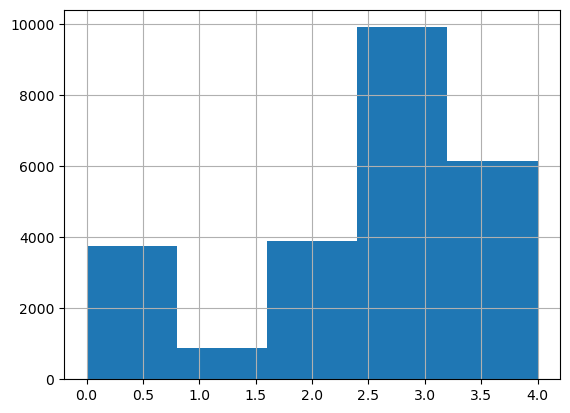

In [27]:
crimes_lean['Danger'].hist(bins=5)

## Date Conversion

Another problem we need to deal with is converting the date to some sort of usable numerical format, such as milliseconds since the last unix epoch. Let's examine this feature again.

In [28]:
crimes_lean['DateReported'].head()

0    2022/10/18 01:08:59+00
1    2022/10/18 00:31:50+00
2    2022/10/17 23:40:34+00
3    2022/10/17 22:24:21+00
4    2022/10/17 19:58:39+00
Name: DateReported, dtype: object

 Commence string munging tricks . . . or maybe we'll just find a library like [`dateutil`](https://labix.org/python-dateutil#head-a23e8ae0a661d77b89dfb3476f85b26f0b30349c)

Yeah, the library is totally the way to go. Of course.

Now, just a matter of using a map or something like that to convert the thing!

In [34]:
import dateutil as du
import datetime as dt

# let's start by making a copy of the column like before
crimes_lean['Epoch'] = crimes_lean.loc[:, 'DateReported']

# next, we need a function that can be mapped over the column to do the conversion.
def date_converter(in_str):
    date = du.parser.parse(in_str)
    return date

# finally, we can map the function across the duplicate column to get the unix epoch
crimes_lean['Weekday'] = crimes_lean['Epoch'].map(lambda x: date_converter(x).weekday())
crimes_lean['Year'] = crimes_lean['Epoch'].map(lambda x: date_converter(x).year)
crimes_lean['Month'] = crimes_lean['Epoch'].map(lambda x: date_converter(x).month)
crimes_lean['Day'] = crimes_lean['Epoch'].map(lambda x: date_converter(x).day)


# now, we can take a peek at our lovely new column!
crimes_lean.head()
   

,Offense,BlockNumber,StreetName,DateReported,HourReported,Danger,Epoch,Weekday,Week,Month,Day,Year
0,Larceny - All Other,800.0,ELLIOTT AVE,2022/10/18 01:08:59+00,2108,3,2022/10/18 01:08:59+00,1,2022,10,18,2022
1,Burglary,800.0,RAYMOND RD,2022/10/18 00:31:50+00,2031,4,2022/10/18 00:31:50+00,1,2022,10,18,2022
2,Assault Aggravated,900.0,W MAIN ST,2022/10/17 23:40:34+00,1940,4,2022/10/17 23:40:34+00,0,2022,10,17,2022
3,Assist Citizen - Mental/TDO/ECO,600.0,E MARKET ST,2022/10/17 22:24:21+00,1824,0,2022/10/17 22:24:21+00,0,2022,10,17,2022
4,Assault Simple,1400.0,UNIVERSITY AVE,2022/10/17 19:58:39+00,1558,4,2022/10/17 19:58:39+00,0,2022,10,17,2022


Booyah!

Now we can actually look at these times numerically to see trends with time for example!

## Location Encoding

### Road Centerlines Dataset

The first step to this process is going to be to find some sort of way to translate the block system used by the Charlottesville Police Department to something that is practically useful. To this end, we have downloaded and will utilize the [Road Centerlines](https://opendata.charlottesville.org/datasets/charlottesville::road-centerlines-block-level/about) dataset.

In [37]:
import geopandas as gpd                         # this allows us to use standard geospatial formats (such as the geojson that we downloaded)

road_lines_full = gpd.read_file("./data/Road_Centerlines_(Block_Level).geojson")             # Note that `road_lines` is a geodataframe, and is not json-esque
print(road_lines_full.head())

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: dlopen(/Users/marcusmann/anaconda3/envs/assignment_4/lib/python3.10/site-packages/fiona/ogrext.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libLerc.4.dylib
  Referenced from: <EB51A80F-3F02-3439-A923-0B1268F24B9E> /Users/marcusmann/anaconda3/envs/assignment_4/lib/libgdal.31.dylib
  Reason: tried: '/Users/marcusmann/anaconda3/envs/assignment_4/lib/libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/lib/python3.10/site-packages/fiona/../../../libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/lib/python3.10/site-packages/fiona/../../../libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/bin/../lib/libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/bin/../lib/libLerc.4.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/lib/libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/lib/python3.10/site-packages/fiona/../../../libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/lib/python3.10/site-packages/fiona/../../../libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/bin/../lib/libLerc.4.dylib' (no such file), '/Users/marcusmann/anaconda3/envs/assignment_4/bin/../lib/libLerc.4.dylib' (no such file), '/usr/local/lib/libLerc.4.dylib' (no such file), '/usr/lib/libLerc.4.dylib' (no such file, not in dyld cache)
Importing pyogrio resulted in: No module named 'pyogrio'

Oh, dear. I thought these were supposed to be centerlines . . . It looks like these are linestrings that describe the left and right edges of the road. \*sigh\*

I suppose we could just pretend one side of the road doesn't exist . . .

It could also be that those with a L / R  attribute are for split highways with a median in between. Regardless, we don't have that level of detail in our crimes data if I am not mistaken.

One thing we can try to simplify this scheme is to use the observation that the finest level of detail we have in the crimes data set is by the block number and street name. Therefore, we are not losing any precision if we were to take the center point of each block, and use that as the coordinate for any crime on that block. To do this, we can take the linestrings formed by the left and right halves of the data, draw additional lines between their starts and ends, which will turn each block into a polygon. We can then find the centerpoint of the polygon to determine a single lat-lon point for the block.

However, because time is short and `geopandas` is complex, we are instead just going to keep only the left side of each block, and we will use the center point of this line string as the geometric coordinate.

In [ ]:
# we would like to make sure that there isn't anything besides left and right
print(road_lines_full.info())
print(road_lines_full.value_counts(["Side"]))

Notably, there are more left-hand sides than right hand sides. I am guessing/assuming this is because one-way streets only have a left-hand side. This doesn't really make sense though, because we really only drive on the right-hand side. Regardless, dropping all of the right-hand rows will work for now.

In [ ]:
# we start by dropping all of the right hand rows.

road_lines_naive = road_lines_full[road_lines_full.Side != "R"]

The center point can then be found with the this [function](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html)

In [ ]:
# we can start by making a copy of the geometry column
road_lines_naive['point'] = road_lines_naive.loc[:, 'geometry']

# then we can make our mapping function
def naive_center_finder(linestring):
    return gpd.GeoSeries([linestring]).centroid[0]

# and then we can map our handy-dandy function over this column
road_lines_naive['point'] = road_lines_naive['point'].map(naive_center_finder)

# and finally see if it worked
print(road_lines_naive.head(10))

weeeellll . . . I suppose it worked. We have no real way of knowing whether those are actually the centerpoints I would hope to see, but hey, at least it's something.

### Using the Road Center Points in the Crimes Data

To actually use what we just made, we can now use this data set to add a coordinate to each crime!

In [ ]:
crimes_lean = crimes_lean.dropna()

In [ ]:
# We are going to start by concatenating the block number and street name into one field.
# hopefully these will be identical for both data sets.
crimes_lean['road_location'] = crimes_lean['StreetName'] + crimes_lean['BlockNumber'].astype(int).astype(str)
# print(crimes_lean.head())

road_lines_naive['road_location'] = road_lines_naive['Street'] + road_lines_naive['Block'].astype(int).astype(str)
print(road_lines_naive.head())

In [ ]:
# next we can make a dictionary out of the road_lines_naive data set
road_centers_dict = dict(zip(road_lines_naive.road_location, road_lines_naive.point))

# and then make a point column for the crimes data
crimes_lean['Point'] = crimes_lean.loc[:, 'road_location']

# and finally we can use the dictionary to map over this column to get our points
crimes_lean['Point'] = crimes_lean['Point'].map(road_centers_dict)

print(crimes_lean.info())

We have successfully given each crime a lat-lon coordinate, which is super fantastic! Even if we had to lose about 6k crimes in the process, and even if the point isn't as accurate as it could be since we only used half of the street.

Also, we really need that point to be split into latitude and longitude columns practically speaking . . .

In [ ]:
# We can do that very easily using geopandas as well
crimes_lean = crimes_lean.dropna()

crimes_lean['Longitude'] = crimes_lean['Point'].apply(lambda point: point.x)
crimes_lean['Latitude'] = crimes_lean['Point'].apply(lambda point: point.y)

print(crimes_lean.head())

# Modeling

In [ ]:
# and now, lets grab just the really useful features we have constructed and see if we get some interesting regression results out of it
crimes_sparse = crimes_lean[['Epoch', 'Latitude', 'Longitude', 'Danger']]

print(crimes_sparse.head())

Wow, we say "sparse", but we should probably say "Charlie-Brown-Christmas-Tree-Esque".

![charlie-brown-tree](https://wallpapercave.com/wp/9Dvub0b.jpg)

It's funny how after extracting the essential information out of the data, we really have very, very little to work with for each record. Just when the reported happened, where the reported incident happend, and how bad the incident was on a scale of 0 to 4. Hopefully that's enough to do some reasonable machine learning . . .

### Visualization Detour

Let's do a quick 3D graph with a random subset of our data to try and get a feel for whether we can legitimately try to use a linear regression to solve our problem.

In [ ]:
sample_crimes = crimes_sparse.sample(frac=0.1, random_state=42)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(sample_crimes['Longitude'], sample_crimes['Latitude'], sample_crimes['Epoch'], c=sample_crimes['Danger'], cmap='jet')

In the above plot, the axes are longitude, latitude, and time for x, y, and z respectively, and the color of each dot is based on its danger level from 0 to 4. Although this isn't the greatest plot, I tend to think this data is _not_ going to be linearly separable by any stretch of the imagination.

So the question then becomes, if we can't do a linear regression, what should we do instead? We have just graphed the full dimensionality of our space, so SVM may not be sufficient here as there doesn't seem to be any sort of clear pattern whatsoever. SVM might still be worth looking into however, especially since it can be used to map the feature space to higher dimensions.

An interesting thing to consider here is that the feature we would want to predict, `Danger`, can be treated as either a categorical or a numeric value. What this means practically is that we can treat this problem not so much as a regression, but rather as a classification problem. Unfortunately, K-Means and other clustering methods will also probably fail to be of use here since the dimensionality is so very low, although they may still be worth trying. 

This leaves us with Neural Nets. A deep neural net may be able to make sense of this low dimensionality feature space in a meaningful way.

### Neural Net mk. I

Let's give the neural net a go.

We can make a validation set and a training set.

In [ ]:
# and we can also standard scale our features
from sklearn import pipeline

# pipeline to standard scale the input
nn_1_pipeline = pipeline.Pipeline([
        ('std_scaler', StandardScaler()),
    ])

# # full pipeline:
# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#     ])

# crimes_sparse_1 = num_pipeline.fit_transform()

In [ ]:
from sklearn.model_selection import train_test_split
X = crimes_sparse.drop('Danger', axis=1)
Y = crimes_sparse['Danger']

nn_1_train_full_X, nn_1_test_X, nn_1_train_full_Y, nn_1_test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
nn_1_train_full_X = nn_1_pipeline.fit_transform(nn_1_train_full_X, nn_1_train_full_Y)
nn_1_test_X = nn_1_pipeline.fit(nn_1_test_X, nn_1_test_Y)
nn_1_train_x, nn_1_val_x, nn_1_train_y, nn_1_val_y = train_test_split(nn_1_train_full_X, nn_1_train_full_Y, test_size=0.1, random_state=42)

print(nn_1_train_x.shape)

print(nn_1_val_x.shape)

In [ ]:
import tensorflow as tf
import keras

nn_1 = tf.keras.models.Sequential(layers=[
    keras.layers.Flatten(),        # input layer
    keras.layers.Dense(units=75, activation='relu'),  # hidden layer
    keras.layers.Dense(units=1750, activation='relu'), # hidden layer
    keras.layers.Dense(units=200, activation='relu'), # hidden layer
    keras.layers.Dense(units=5, activation='softmax') # output softmax layer
])

In [ ]:
nn_1_epochs = 50 
# nn_1_opt = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.1)
nn_1_opt = tf.keras.optimizers.Nadam()
nn_1_loss = ["sparse_categorical_crossentropy"]
nn_1_mtrx = ["accuracy"] 
nn_1.compile(loss= nn_1_loss, optimizer = nn_1_opt, metrics = nn_1_mtrx)
history = nn_1.fit(nn_1_train_x, nn_1_train_y, validation_data=(nn_1_val_x, nn_1_val_y), epochs = nn_1_epochs)

In [ ]:
nn_1.summary()

### SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from scipy.stats import reciprocal, uniform, randint


X_train = nn_1_train_full_X
y_train = nn_1_train_full_Y
X_test  = nn_1_test_X
y_test  = nn_1_test_Y

In [ ]:
# linear
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)

# print confusion matrix, precision score, and recall score
y_pred = svm_linear.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Confusion Matrix: {confusion}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')

In [ ]:
# Polynomial
svm_poly = SVC(kernel="poly", C=1.0)
svm_poly.fit(X_train, y_train)

In [ ]:
# Gaussian RBF 
svm_rbf = SVC(kernel="rbf", C=1.0)
svm_rbf.fit(X_train, y_train)

In [ ]:
classifiers = [svm_linear, svm_poly, svm_rbf]
names = ['linear', 'poly', 'rbf']

param_distributions = [{"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100)},
                       {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100), "degree": randint(2, 10)},
                       {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100)}]

for i in [0, 1, 2]:
  rnd_search_cv = RandomizedSearchCV(classifiers[i], param_distributions[i], n_iter=5, verbose=3, cv=3)
  rnd_search_cv.fit(X_train, y_train)
  print('\n\n-----------------------------------------------------------------')
  print(f'svc with {names[i]} kernel:')
  print(f'best score: {rnd_search_cv.best_score_}')
  print(f'best_estimator: {rnd_search_cv.best_estimator_}')

  # print confusion matrix, precision score, and recall score
  y_pred = rnd_search_cv.predict(X_test)
  confusion = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print(f'Confusion Matrix: {confusion}')
  print(f'Precision Score: {precision}')
  print(f'Recall Score: {recall}')